Import relevant modules

In [5]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

Define functions that build and train a model

In [2]:
def build_model(my_learning_rate):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate), loss="mean_squared_error", metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

def train_model(model, feature, label, epochs, batch_size):
    history = model.fit(x=feature, y=label, batch_size=batch_size, epochs=epochs)

    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    epochs = history.epoch

    hist = pd.DataFrame(history.history)

    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


Define plotting functions

In [3]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    plt.xlabel("feature")
    plt.ylabel("label")

    plt.scatter(feature, label)

    x0 = 0
    y0 = trained_bias
    x1 = feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c='r')

    plt.show()

def plot_the_loss_curve(epochs, rmse):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Define the dataset

In [7]:
my_feature = ([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])
my_label = ([5.0, 8.8, 9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Specify the hyper-parameters

Epoch 1/10
1/1 [==============================] - 1s 582ms/step - loss: 199.2566 - root_mean_squared_error: 14.1158
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 191.9710 - root_mean_squared_error: 13.8554
Epoch 3/10
1/1 [==============================] - 0s 13ms/step - loss: 186.8168 - root_mean_squared_error: 13.6681
Epoch 4/10
1/1 [==============================] - 0s 12ms/step - loss: 182.5783 - root_mean_squared_error: 13.5122
Epoch 5/10
1/1 [==============================] - 0s 12ms/step - loss: 178.8720 - root_mean_squared_error: 13.3743
Epoch 6/10
1/1 [==============================] - 0s 13ms/step - loss: 175.5205 - root_mean_squared_error: 13.2484
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 172.4252 - root_mean_squared_error: 13.1311
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 169.5250 - root_mean_squared_error: 13.0202
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 166.7789 - r

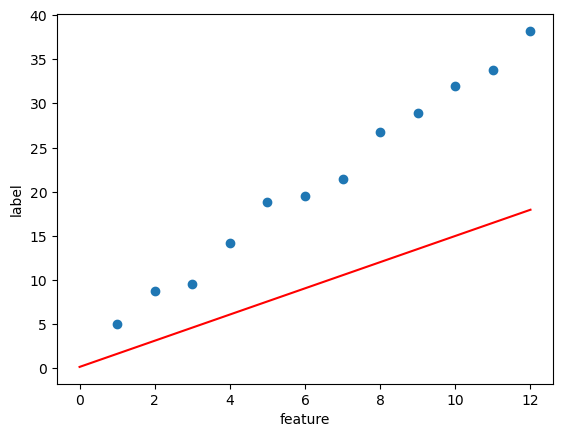

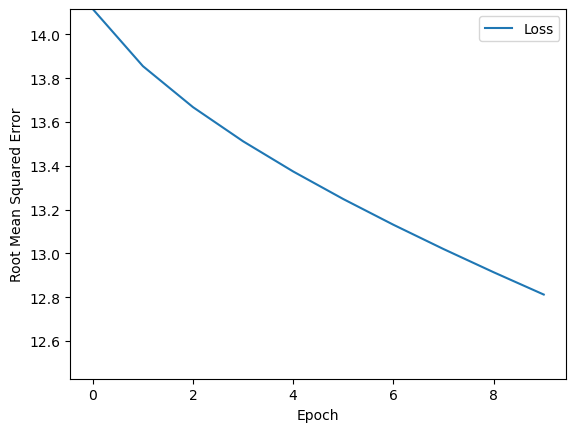

Task 1 complete, the model hasn't been trained sufficiently (examine the graphs).


In [12]:
learning_rate = 0.01
epochs = 10
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)
print("Task 1 complete, the model hasn't been trained sufficiently (examine the graphs).")

Task 2: Increase the number of epochs

Epoch 1/450


/home/leilenkalbermatter/anaconda3/envs/tf/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 1s 619ms/step - loss: 171.9884 - root_mean_squared_error: 13.1144
Epoch 2/450
1/1 [==============================] - 0s 10ms/step - loss: 165.2275 - root_mean_squared_error: 12.8541
Epoch 3/450
1/1 [==============================] - 0s 10ms/step - loss: 160.4540 - root_mean_squared_error: 12.6670
Epoch 4/450
1/1 [==============================] - 0s 8ms/step - loss: 156.5341 - root_mean_squared_error: 12.5114
Epoch 5/450
1/1 [==============================] - 0s 7ms/step - loss: 153.1105 - root_mean_squared_error: 12.3738
Epoch 6/450
1/1 [==============================] - 0s 6ms/step - loss: 150.0180 - root_mean_squared_error: 12.2482
Epoch 7/450
1/1 [==============================] - 0s 9ms/step - loss: 147.1647 - root_mean_squared_error: 12.1311
Epoch 8/450
1/1 [==============================] - 0s 6ms/step - loss: 144.4938 - root_mean_squared_error: 12.0206
Epoch 9/450
1/1 [==============================] - 0s 6ms/step - loss: 141.9670 - root_m

/home/leilenkalbermatter/anaconda3/envs/tf/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


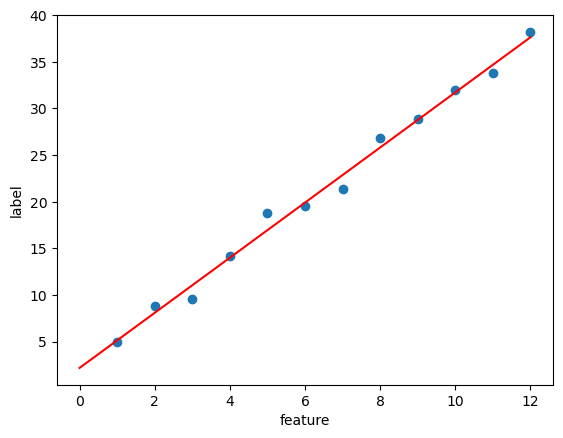

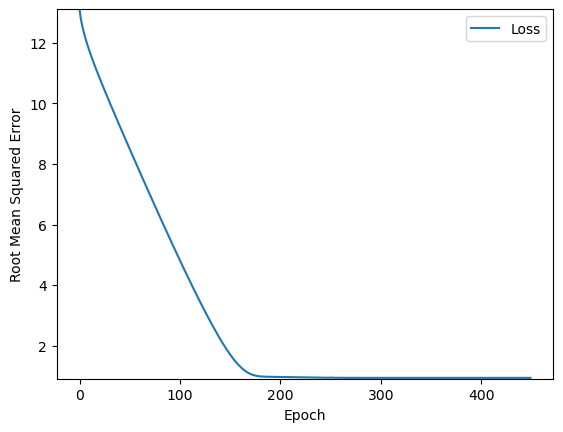

Task 2 complete, the model converge.


In [13]:
learning_rate = 0.01
epochs = 450
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)
print("Task 2 complete, the model converge.")

Task 3: Increase the learning rate, and decrease the number of epochs

Epoch 1/500
1/1 [==============================] - 0s 426ms/step - loss: 1188.1481 - root_mean_squared_error: 34.4695
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 6637994.5000 - root_mean_squared_error: 2576.4307
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 1173.7231 - root_mean_squared_error: 34.2596
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 7.1194 - root_mean_squared_error: 2.6682
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 1.7389 - root_mean_squared_error: 1.3187
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 1.6085 - root_mean_squared_error: 1.2683
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 1.5587 - root_mean_squared_error: 1.2485
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 1.5121 - root_mean_squared_error: 1.2297
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 1.4666 - root_

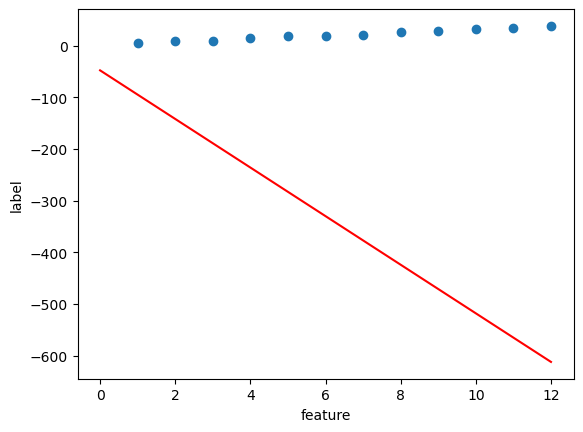

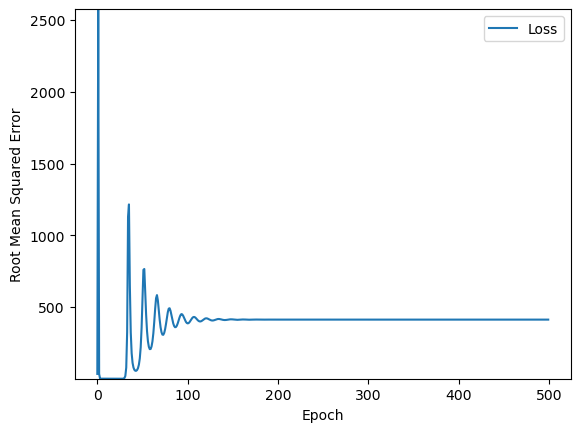

Task 3 complete, the resulting model is not good.


In [16]:
learning_rate = 100
epochs = 500

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)
print("Task 3 complete, the resulting model is not good.")

Task 4: Find the ideal combination of learning rate and epochs

Epoch 1/70
1/1 [==============================] - 0s 446ms/step - loss: 233.6817 - root_mean_squared_error: 15.2867
Epoch 2/70
1/1 [==============================] - 0s 8ms/step - loss: 135.5054 - root_mean_squared_error: 11.6407
Epoch 3/70
1/1 [==============================] - 0s 8ms/step - loss: 87.6848 - root_mean_squared_error: 9.3640
Epoch 4/70
1/1 [==============================] - 0s 13ms/step - loss: 58.7469 - root_mean_squared_error: 7.6647
Epoch 5/70
1/1 [==============================] - 0s 9ms/step - loss: 39.8439 - root_mean_squared_error: 6.3122
Epoch 6/70
1/1 [==============================] - 0s 8ms/step - loss: 27.0827 - root_mean_squared_error: 5.2041
Epoch 7/70
1/1 [==============================] - 0s 6ms/step - loss: 18.3584 - root_mean_squared_error: 4.2847
Epoch 8/70
1/1 [==============================] - 0s 5ms/step - loss: 12.3884 - root_mean_squared_error: 3.5197
Epoch 9/70
1/1 [==============================] - 0s 7ms/step - loss: 8.3315 - root_mean_squared_

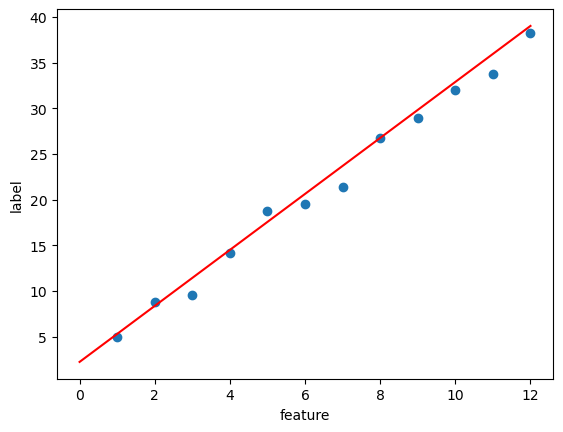

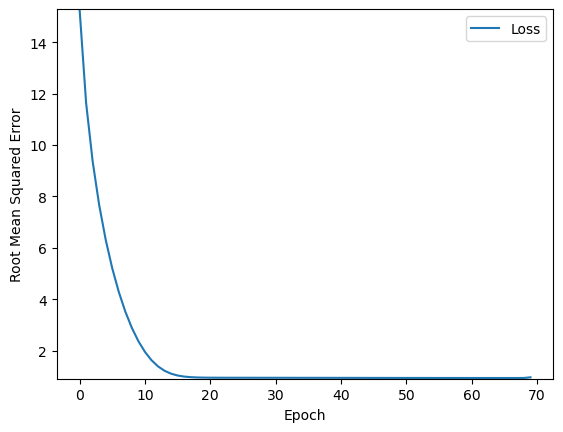

Task 4 complete, the resulting model is good.


In [17]:
learning_rate = 0.14
epochs = 70

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)
print("Task 4 complete, the resulting model is good.")

Task 5: Use a batch size of 1

Epoch 1/125


/home/leilenkalbermatter/anaconda3/envs/tf/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 7ms/step - loss: 937.8284 - root_mean_squared_error: 30.6240
Epoch 2/125
12/12 [==============================] - 0s 7ms/step - loss: 680.0723 - root_mean_squared_error: 26.0782
Epoch 3/125
12/12 [==============================] - 0s 6ms/step - loss: 494.5724 - root_mean_squared_error: 22.2390
Epoch 4/125
12/12 [==============================] - 0s 8ms/step - loss: 363.6961 - root_mean_squared_error: 19.0708
Epoch 5/125
12/12 [==============================] - 0s 7ms/step - loss: 252.1459 - root_mean_squared_error: 15.8791
Epoch 6/125
12/12 [==============================] - 0s 5ms/step - loss: 159.8828 - root_mean_squared_error: 12.6445
Epoch 7/125
12/12 [==============================] - 0s 7ms/step - loss: 90.6137 - root_mean_squared_error: 9.5191
Epoch 8/125
12/12 [==============================] - 0s 5ms/step - loss: 44.7754 - root_mean_squared_error: 6.6914
Epoch 9/125
12/12 [==============================] - 0s 4ms/step - loss: 19.8743

/home/leilenkalbermatter/anaconda3/envs/tf/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


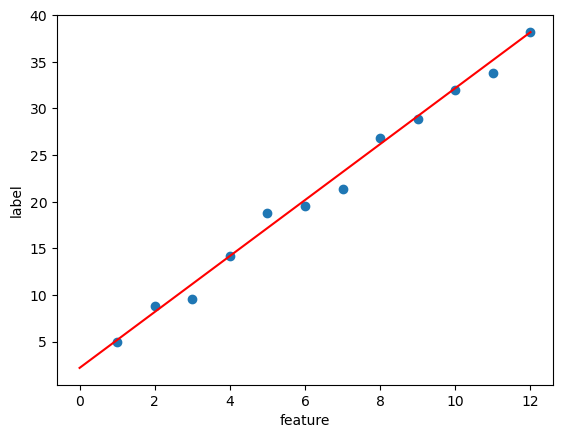

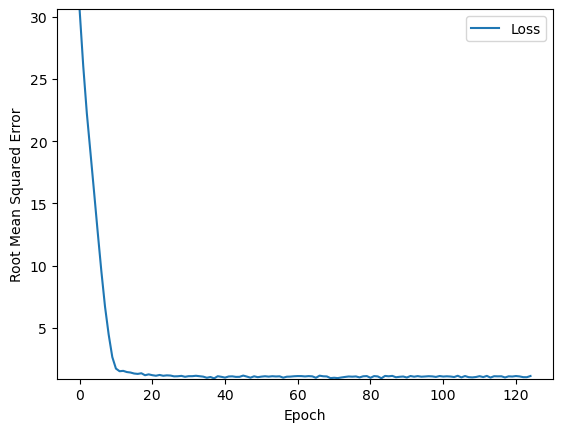

Task 5 complete, the resulting model is good.


In [19]:
learning_rate=0.05
epochs=125
my_batch_size= 1  # Replace ? with an integer.tr

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)
print("Task 5 complete, the resulting model is good.")

Summary of hyperparameter tuning

Most machine learning problems require a lot of hyperparameter tuning. Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly. You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

    Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero.
    If the training loss does not converge, train for more epochs.
    If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
    If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
    Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
    Setting the batch size to a very small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
    For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory.

Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.